In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# ignorando alertas (não erros)

import warnings
warnings.filterwarnings('ignore')

In [4]:
# importando o dataset
df = pd.read_csv('../dataset/data-set-clube-new-v2.csv', sep=';')

In [32]:
# conferindo se existe valor nulo no dataset
df.isnull().values.any()

False

In [33]:
# Removendo a coluna id_socio (não usaremos ela por enquanto)
df.drop('id_socio', inplace=True, axis=1)

In [49]:
df.head(1)

,status,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano
0,CANCELADO,24,0,0,0


In [65]:
# Separando o dataset por status = ATIVO ou CANCELADO

socio_ativo = (df['status'] == "ATIVO")
socio_ativo = df[socio_ativo]

socio_cancelado = (df['status'] == "CANCELADO")
socio_cancelado = df[socio_cancelado]

Nos próximos blocos analisaremos as 2 variáveis acima em: desvio padrão, máximo e mínimo,
média, correlação e faremos alguns gráficos para melhor análise.

##### 1 - DESVIO PADRÃO

In [66]:
# Desvio padrão ATIVO
socio_ativo.std()

qtde_em_aberto          9.562430
qtde_em_dia             7.601072
qtde_em_atraso          6.239905
qtde_frequencia_ano    47.810617
dtype: float64

In [68]:
# Desvio padrão CANCELADO
socio_cancelado.std()

qtde_em_aberto          8.599585
qtde_em_dia             3.402545
qtde_em_atraso          3.195524
qtde_frequencia_ano    13.317581
dtype: float64

##### 2 - MÁXIMO

In [75]:
# Máximo sócio Ativo
socio_ativo.max()

status                 ATIVO
qtde_em_aberto            55
qtde_em_dia               53
qtde_em_atraso            39
qtde_frequencia_ano      490
dtype: object

In [76]:
# Máximo sócio Cancelado
socio_cancelado.max()

status                 CANCELADO
qtde_em_aberto                48
qtde_em_dia                   24
qtde_em_atraso                24
qtde_frequencia_ano          217
dtype: object

##### 3 - MÍNIMO

In [77]:
# Mínimo sócio Ativo
socio_ativo.min()

status                 ATIVO
qtde_em_aberto             0
qtde_em_dia                0
qtde_em_atraso             0
qtde_frequencia_ano        0
dtype: object

In [78]:
# Mínimo sócio Cancelado
socio_cancelado.min()

status                 CANCELADO
qtde_em_aberto                 0
qtde_em_dia                    0
qtde_em_atraso                 0
qtde_frequencia_ano            0
dtype: object

##### 4 - MÉDIA

In [80]:
# Média sócio Ativo
socio_ativo.mean()

qtde_em_aberto          7.483156
qtde_em_dia             5.438830
qtde_em_atraso          3.946809
qtde_frequencia_ano    21.666667
dtype: float64

In [82]:
# Média sócio Cancelado
socio_cancelado.mean()

qtde_em_aberto         19.725032
qtde_em_dia             1.308690
qtde_em_atraso          1.064851
qtde_frequencia_ano     2.741894
dtype: float64

##### 5 - CORRELAÇÃO

In [83]:
# identificando a correlação entre as variáveis
# Correlação não implica causalidade

def plot_corr(df, size=6):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

In [85]:
# Visualizando a correlação em tabela
# Coeficiente de correlação:
   
    # +1 = forte correlação positiva
    # 0 = não há correlação
    # -1 forte correlação negativa
df.corr()

,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano
qtde_em_aberto,1.000000,-0.377307,-0.222397,-0.135453
qtde_em_dia,-0.377307,1.000000,0.221493,0.402164
qtde_em_atraso,-0.222397,0.221493,1.000000,0.236802
qtde_frequencia_ano,-0.135453,0.402164,0.236802,1.000000


Acima podemos ver que a melhor correlação (tendo como base 1 como "forte correlação POSITIVA") está entre as variáveis: 
- qtde_em_dia/qtde_frequencia_ano:  0.402164
- qtde_frequencia_ano/qtde_em_atraso:  0.236802

Podemos ver também que a pior correlação (tendo como base -1 como "forte correlação NEGATIVA") está entre as variáveis:

- qtde_em_dia/qtde_em_aberto:  -0.377307
- qtde_em_atraso/qtde_em_aberto:  -0.222397

##### 6- Gráficos 

###### 6.1 - Pizza

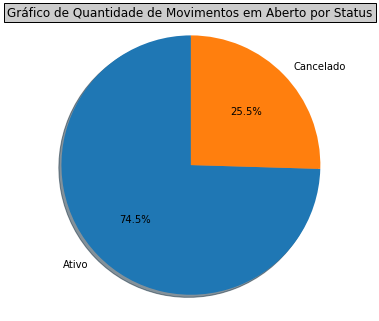

Ativos: 2256
Cancelados: 771


In [93]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes((0,0,.5,1))
ax.set_title('Gráfico de Quantidade de Movimentos em Aberto por Status', bbox={'facecolor':'0.8', 'pad':3})

qtde_em_aberto_ativo = (df['status'] == 'ATIVO') & (df['qtde_em_aberto'] >= 0)
qtde_em_aberto_ativo = df[qtde_em_aberto_ativo]

qtde_em_aberto_cancelado = (df['status'] == 'CANCELADO') & (df['qtde_em_aberto'] >= 0)
qtde_em_aberto_cancelado = df[qtde_em_aberto_cancelado]

labels = ['Ativo', 'Cancelado']
quantidade = [qtde_em_aberto_ativo.shape[0], qtde_em_aberto_cancelado.shape[0]]

explode = (0, 0)
total = sum(quantidade)
plt.pie(quantidade, explode=explode, labels=labels, autopct='%1.1f%%',  shadow=True, startangle=90)

plt.axis('equal') 
plt.show()

print('Ativos: %s' % (qtde_em_aberto_ativo.shape[0]))
print('Cancelados: %s' % (qtde_em_aberto_cancelado.shape[0]))

In [ ]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes((0,0,.5,1))
ax.set_title('Gráfico de Quantidade de Movimentos em Dia por Status', bbox={'facecolor':'0.8', 'pad':3})

qtde_em_dia_ativo = (df['status'] == 'ATIVO') & (df['qtde_em_dia'] >= 0)
qtde_em_dia_ativo = df[qtde_em_dia_ativo]

qtde_em_dia_cancelado = (df['status'] == 'CANCELADO') & (df['qtde_em_dia'] >= 0)
qtde_em_dia_cancelado = df[qtde_em_dia_cancelado]

labels = ['Ativo', 'Cancelado']
quantidade = [qtde_em_dia_ativo.shape[0], qtde_em_dia_cancelado.shape[0]]

explode = (0, 0)
total = sum(quantidade)
plt.pie(quantidade, explode=explode, labels=labels, autopct='%1.1f%%',  shadow=True, startangle=90)

plt.axis('equal') 
plt.show()

print('Ativos: %s' % (qtde_em_dia_ativo.shape[0]))
print('Cancelados: %s' % (qtde_em_dia_cancelado.shape[0]))